In [2]:
from iex import Stock
import requests
import pandas as pd
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from datetime import datetime


import datetime,time


from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from iexfinance.stocks import Stock


Using TensorFlow backend.


In [2]:
# dateparse = lambda word : pd.datetime.strptime(word, '%Y-%m-%d')
#one = str(df.iloc[0]['Date'])[:-9]
strFormat="%Y-%m-%d"
#timeStamp =datetime.datetime.fromtimestamp(time.mktime(time.strptime(one,strFormat))).strftime("%d-%b-%Y")

#dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
#pd.datetime.strftime(datetime.strptime(word, '%Y-%m-%d'), '%d-%b-%Y')
#pd.datetime.strptime(first, '%Y-%m-%d')

df = pd.read_csv(os.path.join(os.getcwd(),"stocks_data","AAPL.csv"))

date_parser = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df['Date'] = df['Date'].map(date_parser)

NameError: name 'pd' is not defined

In [329]:
# word = df.iloc[0]['Date']
# date_parser = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2013-12-31  79.167145  80.182854  79.142860  80.145714  67.919533   55771100
1 2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   58671200
2 2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   98116900
3 2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533  103152700
4 2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   79302300

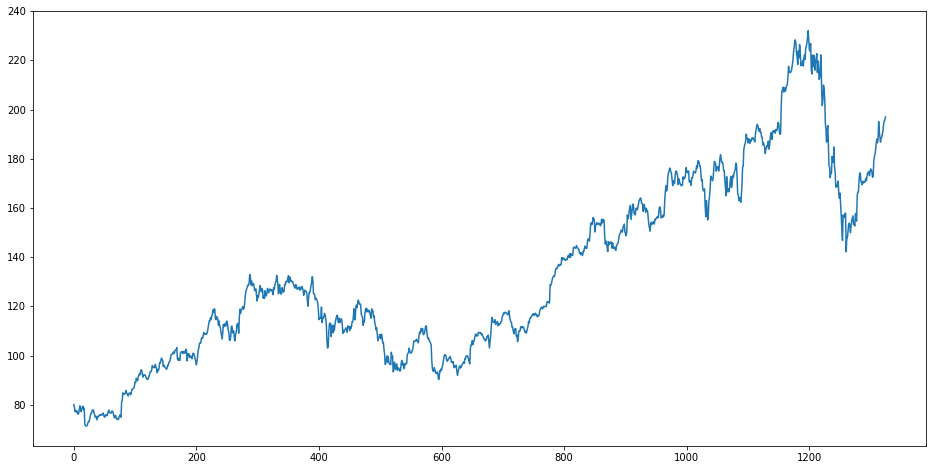

In [230]:
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m')
#df.index = df['Date']
df
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [233]:
temp = df.head()
temp.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2013-12-31  79.167145  80.182854  79.142860  80.145714  67.919533   55771100
1 2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325   58671200
2 2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416   98116900
3 2014-01-06  76.778572  78.114288  76.228569  77.704285  65.850533  103152700
4 2014-01-07  77.760002  77.994286  76.845711  77.148575  65.379593   79302300

In [203]:
json = df.to_json(orient='records')[1:-1].replace('},{', '} {')

In [204]:
first = temp.iloc[0:3]
first

Date       Open       High        Low      Close  Adj Close    Volume
0 2013-12-31  79.167145  80.182854  79.142860  80.145714  67.919533  55771100
1 2014-01-02  79.382858  79.575714  78.860001  79.018570  66.964325  58671200
2 2014-01-03  78.980003  79.099998  77.204285  77.282860  65.493416  98116900

In [205]:
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]
# #new_data.index = new_data.Date
# #new_data.drop('Date', axis=1, inplace=True)

In [206]:
cols_to_delete = ['Open','High','Low','Adj Close','Volume']

for col in cols_to_delete:
    del first[col]

In [218]:
labels = list(first['Date'])
values = list(first['Close'])

values

[80.145714, 79.01857, 77.28286]

# In one place


In [295]:
stock_name = "AAPL.csv"
strFormat="%Y-%m-%d"
dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df = pd.read_csv(os.path.join(os.getcwd(),"stocks_data",stock_name),parse_dates=['Date'],date_parser=dateparse)

cols_to_delete = ['Open','High','Low','Adj Close','Volume']
for col in cols_to_delete:
    del df[col]

In [296]:
df.head()

Date      Close
0 2013-12-31  80.145714
1 2014-01-02  79.018570
2 2014-01-03  77.282860
3 2014-01-06  77.704285
4 2014-01-07  77.148575

In [294]:
data = list(df['Close'])
len(data)

1325

# Do not modify Below this

In [3]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

NameError: name 'df' is not defined

In [4]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

NameError: name 'data' is not defined

In [21]:
print(new_data.head())
dataset = new_data.values
dataset

              Close
Date               
2013-12-31  80.1457
2014-01-02  79.0186
2014-01-03  77.2829
2014-01-06  77.7043
2014-01-07  77.1486


array([[80.145714],
       [79.01857],
       [77.28286],
       ...,
       [195.350006],
       [195.690002],
       [197.0]], dtype=object)

In [22]:
dataset.shape

(1325, 1)

In [23]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

/home/sourabh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0544496 ],
       [0.04743445],
       [0.03663169],
       ...,
       [0.77146109],
       [0.77357717],
       [0.78173037]])

In [25]:
x_train, y_train = [], []
train_split = math.floor(0.75 * dataset.shape[0])
print(train_split)

train = dataset[0:train_split,:]
valid = dataset[train_split:,:]



993
(993, 1)


In [28]:
scaled_data[60,0]

0.03296849139418473

In [39]:
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

(933, 60)

In [43]:
x_train.shape

(933, 60, 1)

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Epoch 1/1
 - 37s - loss: 0.0017


In [29]:
print(len(new_data),len(valid))

1325 332


In [47]:

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)



/home/sourabh/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
inputs.shape

(392, 1)

In [48]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [49]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.119715609924315

/home/sourabh/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


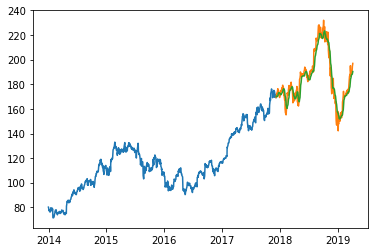

In [51]:
train = new_data[:train_split]
valid = new_data[train_split:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# Prediction in one place :


In [5]:
l = os.getcwd().split('/')[:-1]
('/').join(l)

'/home/sourabh/Work/Course Work/Sem 2/SPE/project/SmartStocks'

In [6]:
stock_name = "AAPL.csv"
strFormat="%Y-%m-%d"
dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
path = os.getcwd().split('/')[:-1]
path = ('/').join(l)

df = pd.read_csv(os.path.join(path,"stocks_data",stock_name),parse_dates=['Date'],date_parser=dateparse)

cols_to_delete = ['Open','High','Low','Adj Close','Volume']
for col in cols_to_delete:
    del df[col]


data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])


for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [7]:
dataset = new_data.values
scaled_data = scaler.fit_transform(dataset)

/home/sourabh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
x_train, y_train = [], []
train_split = math.floor(0.75 * dataset.shape[0])

train = dataset[0:train_split,:]
valid = dataset[train_split:,:]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 37s - loss: 0.0014


In [11]:

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)



/home/sourabh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [13]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.08561406670136

/home/sourabh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sourabh/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


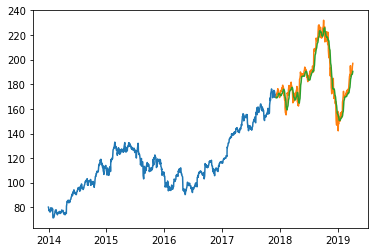

In [14]:
train = new_data[:train_split]
valid = new_data[train_split:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# Class based implementation of above :

In [9]:

###########################################

#Need to change constructor Stock.symbols to stock.stock_name



class Preprocessing:    
    strFormat="%Y-%m-%d"
    dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),Preprocessing.strFormat))).strftime("%d-%b-%Y")
    cols_to_delete = ['Open','High','Low','Adj Close','Volume']
    path = os.getcwd().split('/')[:-1]
    path  = ('/').join(path)
    print(path)
    
    
    
    def __init__(self,stock):
        #self.stock_name = stock.stock_name
        self.stock_name = stock.symbols[0]
        self.scaler = MinMaxScaler(feature_range=(0, 1))

        

        
    def pre_process(self):
        
        self.file = os.path.join(Preprocessing.path,"stocks_data",self.stock_name) + ".csv"
        self.df = pd.read_csv(self.file,parse_dates=['Date'],date_parser=Preprocessing.dateparse)

        for col in Preprocessing.cols_to_delete:
            del self.df[col]
            
        self.data = self.df.sort_index(ascending=True, axis=0)
        self.new_data = pd.DataFrame(index=range(0,len(self.df)),columns=['Date', 'Close'])


        for i in range(0,len(self.data)):
            self.new_data['Date'][i] = self.data['Date'][i]
            self.new_data['Close'][i] = self.data['Close'][i]
            
        self.new_data.index = self.new_data.Date
        self.new_data.drop('Date', axis=1, inplace=True)  
        
        self.dataset = self.new_data.values
        self.scaled_data = self.scaler.fit_transform(self.dataset)
        
        return self.scaled_data
    
    

scaled_data = Preprocessing(Stock("AAPL"))
scaled_data = scaled_data.pre_process()


/home/sourabh/Work/Course Work/Sem 2/SPE/project/SmartStocks


/home/sourabh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
###########################################

#Need to change constructor Stock.symbols to stock.stock_name and in model_exists file_path


from keras.callbacks import ModelCheckpoint
from keras.models import load_model


class Prediction:
    
    path = os.getcwd().split('/')[:-1]
    path  = ('/').join(path)
    
    def __init__(self,stock):
        self.stock = stock
        self.preprocessing = Preprocessing(self.stock)
        self.scaled_data = self.preprocessing.pre_process()  
        
        self.model_exists()
        

    
    def model_exists(self):
        self.file_path = os.path.join(Prediction.path,"ml_models",self.stock.symbols[0]) + ".h5"
        
        if os.path.isfile(self.file_path):
            self.model = load_model(self.file_path)  
        else:
            self.create_model()
        
    def transform(self):
        self.x_train, self.y_train = [], []
        
        for i in range(60,len(self.scaled_data)):
            self.x_train.append(self.scaled_data[i-60:i,0])
            self.y_train.append(self.scaled_data[i,0])
        self.x_train, self.y_train = np.array(self.x_train), np.array(self.y_train)
        self.x_train = np.reshape(self.x_train, (self.x_train.shape[0],self.x_train.shape[1],1))

        
    def train_model(self):
        self.model.compile(loss='mean_squared_error', optimizer='adam')        
        self.checkpointer = ModelCheckpoint(filepath=self.file_path, verbose=1, save_best_only=True)        
        self.model.fit(self.x_train, self.y_train, batch_size=100, epochs=5, verbose=2, validation_split = 0.25, callbacks=[self.checkpointer])
        #self.model.fit(self.x_train, self.y_train,validation_split = 0.25,epochs=5, batch_size=100, verbose=2)
        
        

    def create_model(self):        
        self.transform()

        self.model = Sequential()
        self.model.add(LSTM(units=50, return_sequences=True, input_shape=(self.x_train.shape[1],1)))
        self.model.add(LSTM(units=50))
        self.model.add(Dense(1))

        self.train_model()

        self.model.save(self.file_path)
            
            
    
    def update_model(self,number_of_days):
        self.new_data = self.scaled_data
        self.x_new, self.y_new = [], []
        
        for i in range(len(self.new_data) - number_of_days, len(self.new_data)):
            self.x_new.append(self.new_data[i-60:i,0])
            self.y_new.append(self.new_data[i,0])
            
        self.x_new, self.y_new = np.array(self.x_new), np.array(self.y_new)
        self.x_new = np.reshape(self.x_new, (self.x_new.shape[0],self.x_new.shape[1],1))

        
        self.model.fit(self.x_new,self.y_new,epochs=1, batch_size=1, verbose=2)
        self.model.save(self.file_path)
        
        
    def predict_stock_price(self):        
        self.x_latest, self.y_latest = [], []
        
        
        self.x_latest.append(self.scaled_data[len(self.scaled_data) - 60:])
        self.y_latest.append(self.scaled_data[[-1,0]])   

        self.x_latest, self.y_latest = np.array(self.x_latest), np.array(self.y_latest)
        self.x_latest = np.reshape(self.x_latest, (self.x_latest.shape[0],self.x_latest.shape[1],1))
        
        
        self.predicted_price = self.model.predict(self.x_latest)
        self.predicted_price = self.preprocessing.scaler.inverse_transform(self.predicted_price)
        
        return self.predicted_price[0][0]
        
        
        
            
        
        
        

            
    
        
        
Prediction(Stock("AAPL")).predict_stock_price() 
        

/home/sourabh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


192.45395